Front Matter

In [16]:
import os
import pandas as pd
from tqdm import tqdm
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import joblib


Sector Definition

In [ ]:
# Define the sectors and their top 10 performing stocks
sectors = {
    "technology": ["AAPL", "MSFT", "GOOGL", "NVDA", "META", "ORCL", "ADBE", "CRM", "INTC", "AMD", "IBM"],
    "medicine": ["PFE", "JNJ", "MRK", "ABBV", "BMY", "LLY", "AMGN", "GILD", "REGN", "BIIB"],
    "industrial": ["GE", "CAT", "HON", "BA", "MMM", "DE", "LMT", "RTX", "NOC", "EMR"],
    "finance": ["JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "BK", "USB", "PNC"],
    "consumer_discretionary": ["TSLA", "AMZN", "HD", "LOW", "NKE", "SBUX", "MCD", "TGT", "DIS", "ROST"]
}


Data Retrival and CSV Creation

In [3]:
# Alpha Vantage API key
key = open('AV_API_Key.txt').read().strip()

# Function to request stock price data and save to CSV
def request_and_save_stock_data(symbol, sector, token):
    q_string = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize=full&apikey={}'
    
    # Request data from Alpha Vantage
    print(f"Retrieving data for {symbol}...")
    r = requests.get(q_string.format(symbol, token))
    if "Time Series (Daily)" not in r.json():
        print(f"Error retrieving data for {symbol}")
        return None

    # Parse data into a DataFrame
    date = []
    df = pd.DataFrame()
    for i in r.json()['Time Series (Daily)'].keys():
        date.append(i)
        row = pd.DataFrame.from_dict(r.json()['Time Series (Daily)'][i], orient='index').reset_index().T[1:]
        df = pd.concat([df, row], ignore_index=True)
    df.columns = ["open", "high", "low", "close", "volume"]
    df['date'] = date

    # Save to CSV
    file_name = f"{sector}_{symbol}.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved to {file_name}")
    return file_name

# Iterate over sectors and stocks to save data
stock_csv_mapping = {}
for sector, stocks in tqdm(sectors.items()):
    stock_csv_mapping[sector] = {}
    for stock in stocks:
        file_name = request_and_save_stock_data(stock, sector, key)
        if file_name:
            stock_csv_mapping[sector][stock] = file_name

# Output the mapping of stocks to their CSV files
stock_csv_mapping

  0%|          | 0/5 [00:00<?, ?it/s]

Retrieving data for AAPL...
Data saved to technology_AAPL.csv
Retrieving data for MSFT...
Data saved to technology_MSFT.csv
Retrieving data for GOOGL...
Data saved to technology_GOOGL.csv
Retrieving data for NVDA...
Data saved to technology_NVDA.csv
Retrieving data for META...
Data saved to technology_META.csv
Retrieving data for ORCL...
Data saved to technology_ORCL.csv
Retrieving data for ADBE...
Data saved to technology_ADBE.csv
Retrieving data for CRM...
Data saved to technology_CRM.csv
Retrieving data for INTC...
Data saved to technology_INTC.csv
Retrieving data for AMD...


 20%|██        | 1/5 [09:43<38:55, 583.95s/it]

Data saved to technology_AMD.csv
Retrieving data for PFE...
Data saved to medicine_PFE.csv
Retrieving data for JNJ...
Data saved to medicine_JNJ.csv
Retrieving data for MRK...
Data saved to medicine_MRK.csv
Retrieving data for ABBV...
Data saved to medicine_ABBV.csv
Retrieving data for BMY...
Data saved to medicine_BMY.csv
Retrieving data for LLY...
Data saved to medicine_LLY.csv
Retrieving data for AMGN...
Data saved to medicine_AMGN.csv
Retrieving data for GILD...
Data saved to medicine_GILD.csv
Retrieving data for REGN...
Data saved to medicine_REGN.csv
Retrieving data for BIIB...


 40%|████      | 2/5 [19:49<29:50, 596.70s/it]

Data saved to medicine_BIIB.csv
Retrieving data for GE...
Data saved to industrial_GE.csv
Retrieving data for CAT...
Data saved to industrial_CAT.csv
Retrieving data for HON...
Data saved to industrial_HON.csv
Retrieving data for BA...
Data saved to industrial_BA.csv
Retrieving data for MMM...
Data saved to industrial_MMM.csv
Retrieving data for DE...
Error retrieving data for DE
Retrieving data for LMT...
Error retrieving data for LMT
Retrieving data for RTX...
Error retrieving data for RTX
Retrieving data for NOC...
Error retrieving data for NOC
Retrieving data for EMR...


 60%|██████    | 3/5 [24:54<15:26, 463.48s/it]

Error retrieving data for EMR
Retrieving data for JPM...
Error retrieving data for JPM
Retrieving data for BAC...
Error retrieving data for BAC
Retrieving data for WFC...
Error retrieving data for WFC
Retrieving data for C...
Error retrieving data for C
Retrieving data for GS...
Error retrieving data for GS
Retrieving data for MS...
Error retrieving data for MS
Retrieving data for AXP...
Error retrieving data for AXP
Retrieving data for BK...
Error retrieving data for BK
Retrieving data for USB...


 80%|████████  | 4/5 [24:56<04:41, 281.33s/it]

Error retrieving data for USB
Retrieving data for PNC...
Error retrieving data for PNC
Retrieving data for TSLA...
Error retrieving data for TSLA
Retrieving data for AMZN...
Error retrieving data for AMZN
Retrieving data for HD...
Error retrieving data for HD
Retrieving data for LOW...
Error retrieving data for LOW
Retrieving data for NKE...
Error retrieving data for NKE
Retrieving data for SBUX...
Error retrieving data for SBUX
Retrieving data for MCD...
Error retrieving data for MCD
Retrieving data for TGT...
Error retrieving data for TGT
Retrieving data for DIS...
Error retrieving data for DIS
Retrieving data for ROST...


100%|██████████| 5/5 [24:58<00:00, 299.75s/it]

Error retrieving data for ROST


{'technology': {'AAPL': 'technology_AAPL.csv',
  'MSFT': 'technology_MSFT.csv',
  'GOOGL': 'technology_GOOGL.csv',
  'NVDA': 'technology_NVDA.csv',
  'META': 'technology_META.csv',
  'ORCL': 'technology_ORCL.csv',
  'ADBE': 'technology_ADBE.csv',
  'CRM': 'technology_CRM.csv',
  'INTC': 'technology_INTC.csv',
  'AMD': 'technology_AMD.csv'},
 'medicine': {'PFE': 'medicine_PFE.csv',
  'JNJ': 'medicine_JNJ.csv',
  'MRK': 'medicine_MRK.csv',
  'ABBV': 'medicine_ABBV.csv',
  'BMY': 'medicine_BMY.csv',
  'LLY': 'medicine_LLY.csv',
  'AMGN': 'medicine_AMGN.csv',
  'GILD': 'medicine_GILD.csv',
  'REGN': 'medicine_REGN.csv',
  'BIIB': 'medicine_BIIB.csv'},
 'industrial': {'GE': 'industrial_GE.csv',
  'CAT': 'industrial_CAT.csv',
  'HON': 'industrial_HON.csv',
  'BA': 'industrial_BA.csv',
  'MMM': 'industrial_MMM.csv'},
 'finance': {},
 'consumer_discretionary': {}}

Data Preprocessing

In [4]:
# Initialize dictionary to store preprocessed data
# Define the user portfolio and corresponding CSV files in dictionary format
user_portfolio_csvs = {
    'IBM': 'medicine_IBM.csv',
    'AAPL': 'technology_AAPL.csv',
    'MSFT': 'technology_MSFT.csv',
    'JNJ': 'medicine_JNJ.csv',
    'GILD': 'medicine_GILD.csv',
    'CAT': 'industrial_CAT.csv'
}

preprocessed_data = {}

for stock, file_name in user_portfolio_csvs.items():
    try:
        # Load the CSV file
        df = pd.read_csv(file_name)
        
        # Convert date column to datetime
        df['date'] = pd.to_datetime(df['date'])
        
        # Convert columns to numeric
        for col in ['open', 'high', 'low', 'close', 'volume']:
            df[col] = pd.to_numeric(df[col])
        
        # Replace NaN values with column mean
        df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)
        
        # Calculate technical indicators
        # Moving Averages
        ma_day = [10, 50, 100]
        for ma in ma_day:
            column_name = f"MA for {ma} days"
            df[column_name] = df['close'].rolling(window=ma).mean()
        
        # Daily Return
        df['Daily Return'] = df['close'].pct_change()
        
        # EMAs for various periods
        df['ema7'] = df['close'].ewm(span=7, adjust=False).mean()
        df['ema14'] = df['close'].ewm(span=14, adjust=False).mean()
        df['ema30'] = df['close'].ewm(span=30, adjust=False).mean()
        df['ema60'] = df['close'].ewm(span=60, adjust=False).mean()

        # Sort by date and reset index
        df = df.sort_values('date')
        df.reset_index(drop=True, inplace=True)
        
        # Fill any remaining NaN values
        df.fillna(method='bfill', inplace=True)
        
        # Save the preprocessed DataFrame back to the same CSV file
        df.to_csv(file_name, index=False)
        
        # Store the preprocessed DataFrame in the dictionary
        preprocessed_data[stock] = df
        print(f"Successfully processed {stock} data")
        
    except FileNotFoundError:
        print(f"File {file_name} not found. Skipping {stock}.")

# Output the first few rows of a sample preprocessed stock if any was successful
if preprocessed_data:
    sample_stock = list(preprocessed_data.keys())[0]
    print(f"\nSample of preprocessed data for {sample_stock}:")
    print(preprocessed_data[sample_stock].head())
else:
    print("\nNo data was processed. Check if the CSV files exist.")

File medicine_IBM.csv not found. Skipping IBM.
Successfully processed AAPL data


C:\Users\yuvbo\AppData\Local\Temp\ipykernel_13584\2923465519.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\yuvbo\AppData\Local\Temp\ipykernel_13584\2923465519.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Successfully processed MSFT data
Successfully processed JNJ data


C:\Users\yuvbo\AppData\Local\Temp\ipykernel_13584\2923465519.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\yuvbo\AppData\Local\Temp\ipykernel_13584\2923465519.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Successfully processed GILD data
Successfully processed CAT data

Sample of preprocessed data for AAPL:
    open   high    low  close   volume       date  MA for 10 days  \
0  80.00  80.69  77.37  77.62  2487300 1999-11-01          87.160   
1  78.00  81.69  77.31  80.25  3564600 1999-11-02          88.342   
2  81.62  83.25  81.00  81.50  2932700 1999-11-03          89.436   
3  82.06  85.37  80.62  83.62  3384700 1999-11-04          90.311   
4  84.62  88.37  84.00  88.31  3721500 1999-11-05          90.911   

   MA for 50 days  MA for 100 days  Daily Return       ema7      ema14  \
0         97.3678         106.0554     -0.032773  83.647725  87.411288   
1         97.5592         106.6661     -0.015337  85.656966  88.917640   
2         97.8892         107.2592     -0.025353  87.459288  90.251123   
3         98.2680         107.8355     -0.053108  89.445718  91.597450   
4         98.6744         108.3587     -0.083636  91.387624  92.824750   

       ema30       ema60  
0  92.468

C:\Users\yuvbo\AppData\Local\Temp\ipykernel_13584\2923465519.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Sector Wise Visualizations

In [ ]:
# Visualize sector-wise stock data
for sector, stocks in preprocessed_data.items():
    print(f"\nVisualizing data for sector: {sector}\n")
    
    # Combine all stocks in the sector into one DataFrame for visualization
    combined_df = pd.DataFrame()
    for stock, df in stocks.items():
        df_temp = df.copy()
        df_temp['stock'] = stock  # Add a column to identify the stock
        combined_df = pd.concat([combined_df, df_temp], ignore_index=True)

    # Plot closing prices for all stocks in the sector
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=combined_df, x='date', y='close', hue='stock')
    plt.title(f"Closing Prices for {sector.capitalize()} Sector")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend(title="Stock")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot daily returns distribution
    plt.figure(figsize=(14, 7))
    for stock, df in stocks.items():
        sns.kdeplot(df['Daily Return'].dropna(), label=stock)
    plt.title(f"Daily Returns Distribution for {sector.capitalize()} Sector")
    plt.xlabel("Daily Return")
    plt.ylabel("Density")
    plt.legend(title="Stock")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot EMA comparison for a representative stock
    sample_stock = list(stocks.keys())[0]
    plt.figure(figsize=(14, 7))
    plt.plot(stocks[sample_stock]['date'], stocks[sample_stock]['close'], label='Close Price')
    plt.plot(stocks[sample_stock]['date'], stocks[sample_stock]['ema7'], label='EMA 7 days')
    plt.plot(stocks[sample_stock]['date'], stocks[sample_stock]['ema30'], label='EMA 30 days')
    plt.plot(stocks[sample_stock]['date'], stocks[sample_stock]['ema60'], label='EMA 60 days')
    plt.title(f"EMA Comparison for {sample_stock} in {sector.capitalize()} Sector")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

BiLSTM Model Implementation

In [12]:
# Split data into training and testing sets
def split_data(df, test_size=0.2):
    train_size = int(len(df) * (1 - test_size))
    train_data = df[:train_size]
    test_data = df[train_size:]
    return train_data, test_data

# Prepare data for LSTM model
def prepare_data_for_lstm(df, target_col='close', lookback=60):
    """Prepare data for LSTM model with a lookback period"""
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[target_col].values.reshape(-1, 1))
    
    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i, 0])
        y.append(scaled_data[i, 0])
    
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    
    return X, y, scaler

# Create Bidirectional LSTM model for improved performance
def create_bilstm_model(input_shape):
    """Create Bidirectional LSTM model for stock price prediction"""
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=input_shape)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the model
def train_lstm_model(df, lookback=60, epochs=12, batch_size=32, test_size=0.2):
    """Train and evaluate LSTM model"""
    # Split data
    train_data, test_data = split_data(df, test_size)
    
    # Prepare data for LSTM
    X_train, y_train, scaler = prepare_data_for_lstm(train_data, lookback=lookback)
    X_test, y_test, _ = prepare_data_for_lstm(pd.concat([train_data.iloc[-lookback:], test_data]), lookback=lookback)
    
    # Create and train model
    model = create_bilstm_model((X_train.shape[1], 1))
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_test, y_test), verbose=1)
    
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Inverse scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    return model, scaler, test_predictions, y_test_actual, test_data['date'].reset_index(drop=True), history

# EMA constraint function
def apply_ema_constraint(prediction, df, window=60, max_deviation=0.1):
    """Apply EMA constraint to ensure prediction is within reasonable range"""
    # Calculate EMA of actual prices
    ema = df['close'].ewm(span=window, adjust=False).mean().iloc[-1]
    
    # Set upper and lower bounds based on EMA
    upper_bound = ema * (1 + max_deviation)
    lower_bound = ema * (1 - max_deviation)
    
    # Apply constraints
    if prediction > upper_bound:
        constrained_prediction = upper_bound
    elif prediction < lower_bound:
        constrained_prediction = lower_bound
    else:
        constrained_prediction = prediction
    
    return constrained_prediction, ema, lower_bound, upper_bound

Training and Saving Models for each Stock


Training LSTM model for AAPL
Epoch 1/12


c:\Users\yuvbo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0147 - val_loss: 0.0035
Epoch 2/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 3/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 4/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 5/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 8.1167e-04 - val_loss: 0.0021
Epoch 6/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 9.5164e-04 - val_loss: 0.0017
Epoch 7/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 7.5624e-04 - val_loss: 0.0023
Epoch 8/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 9/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 7.4127e-04 - val_loss: 0.0015
Epoch 10/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 9.7189e-04 - val_loss: 0.0015
Epoch 11/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 9.7040e-04 - val_loss: 0.0014
Epoch 12/12
159/159 ━━━

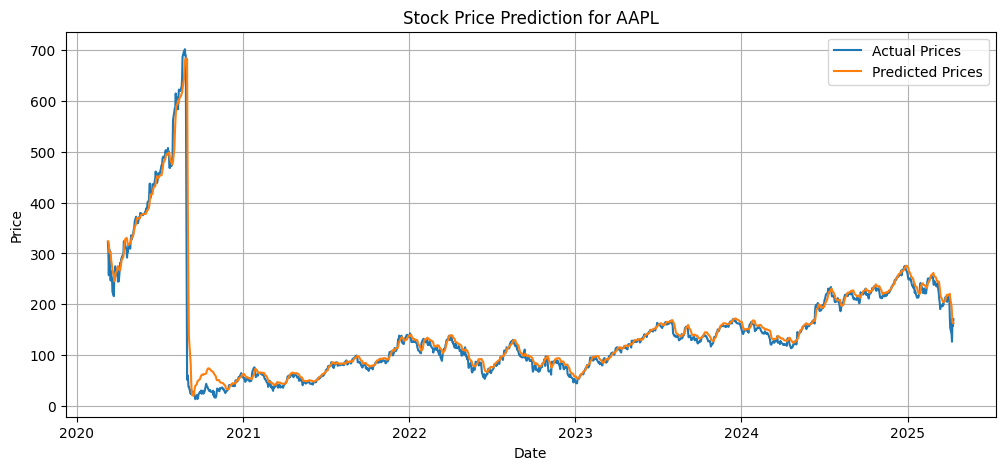

Model and scaler saved for AAPL.

Training LSTM model for MSFT
Epoch 1/12


c:\Users\yuvbo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0083 - val_loss: 0.0017
Epoch 2/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 6.2858e-04 - val_loss: 0.0014
Epoch 3/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 7.0643e-04 - val_loss: 8.6391e-04
Epoch 4/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 5.6065e-04 - val_loss: 8.6400e-04
Epoch 5/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 5.2384e-04 - val_loss: 0.0011
Epoch 6/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 5.1306e-04 - val_loss: 0.0011
Epoch 7/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 4.2440e-04 - val_loss: 7.8390e-04
Epoch 8/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 3.7846e-04 - val_loss: 6.9141e-04
Epoch 9/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 3.7780e-04 - val_loss: 9.3433e-04
Epoch 10/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 4.0253e-04 - val_loss: 5.9458e-04
Epoch 11/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 3.6791e-04 - 

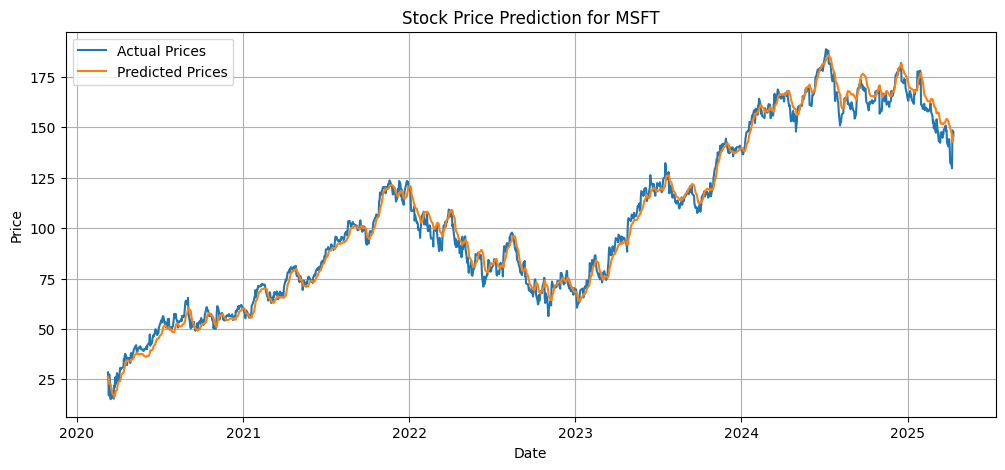

Model and scaler saved for MSFT.

Training LSTM model for JNJ
Epoch 1/12


c:\Users\yuvbo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.0206 - val_loss: 0.0035
Epoch 2/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 3/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 4/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 5/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 6/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 7/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 8/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 9.5972e-04 - val_loss: 0.0014
Epoch 10/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 9.4908e-04 - val_loss: 0.0013
Epoch 11/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 9.1099e-04 - val_loss: 0.0015
Epoch 12/12
159/159 ━━━━━━━━━━━━━━━

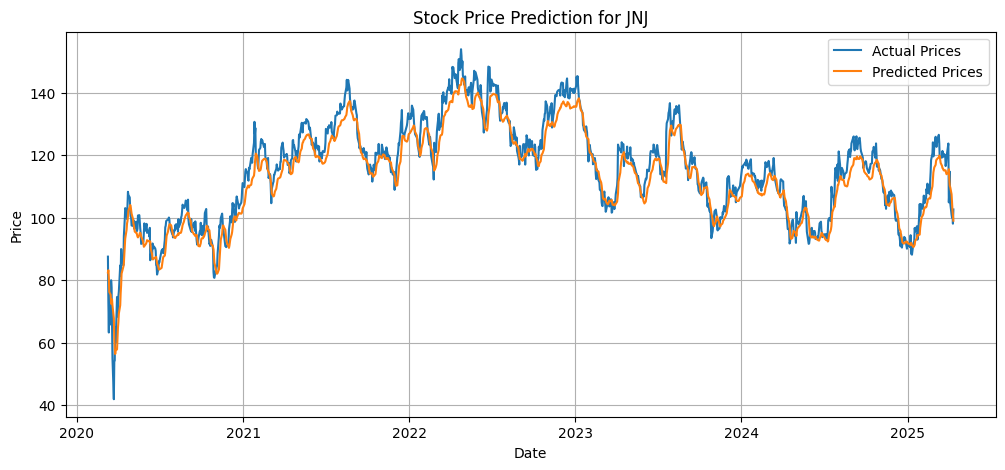

Model and scaler saved for JNJ.

Training LSTM model for GILD
Epoch 1/12


c:\Users\yuvbo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.0133 - val_loss: 0.0016
Epoch 2/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 0.0025 - val_loss: 9.6838e-04
Epoch 3/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 4/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - loss: 0.0020 - val_loss: 7.6222e-04
Epoch 5/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 0.0017 - val_loss: 7.1029e-04
Epoch 6/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - loss: 0.0012 - val_loss: 6.6348e-04
Epoch 7/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - loss: 0.0014 - val_loss: 7.4390e-04
Epoch 8/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - loss: 0.0013 - val_loss: 6.6105e-04
Epoch 9/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 0.0016 - val_loss: 7.0312e-04
Epoch 10/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - loss: 0.0013 - val_loss: 5.9642e-04
Epoch 11/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 0.0011 - val_loss: 6.1754e-04
Epo

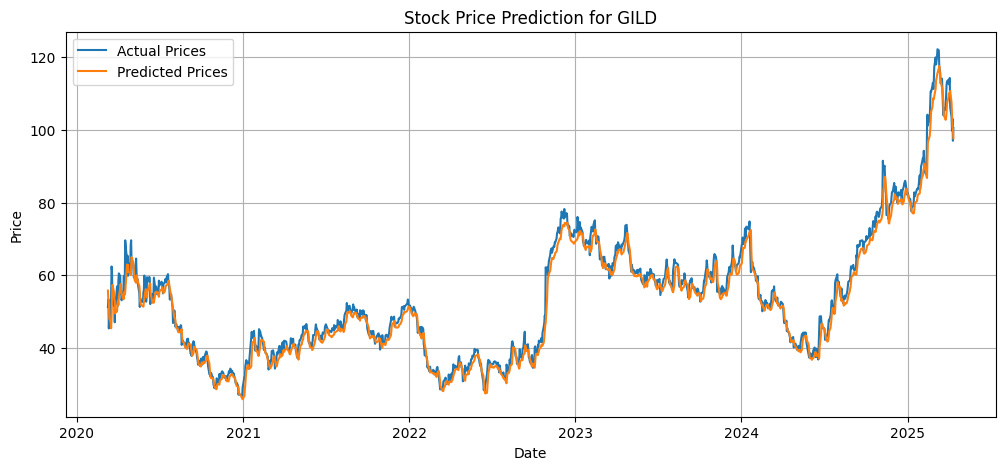

Model and scaler saved for GILD.

Training LSTM model for CAT
Epoch 1/12


c:\Users\yuvbo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 0.0183 - val_loss: 0.0018
Epoch 2/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0016 - val_loss: 8.1683e-04
Epoch 4/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0015 - val_loss: 7.1293e-04
Epoch 6/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 0.0011 - val_loss: 7.3622e-04
Epoch 7/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - loss: 9.1983e-04 - val_loss: 5.4550e-04
Epoch 8/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 9.5281e-04 - val_loss: 0.0010
Epoch 9/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0012 - val_loss: 5.2726e-04
Epoch 10/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 8.0407e-04 - val_loss: 5.5383e-04
Epoch 11/12
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 9.0761e-04 - val_loss: 4.6868e-

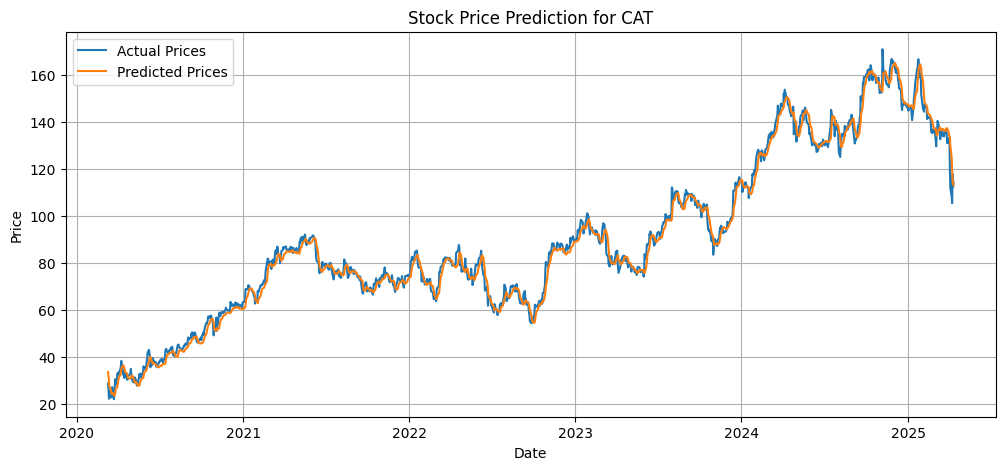

Model and scaler saved for CAT.


{'AAPL': {'model_file': 'AAPL_lstm_model.keras',
  'scaler_file': 'AAPL_scaler.joblib'},
 'MSFT': {'model_file': 'MSFT_lstm_model.keras',
  'scaler_file': 'MSFT_scaler.joblib'},
 'JNJ': {'model_file': 'JNJ_lstm_model.keras',
  'scaler_file': 'JNJ_scaler.joblib'},
 'GILD': {'model_file': 'GILD_lstm_model.keras',
  'scaler_file': 'GILD_scaler.joblib'},
 'CAT': {'model_file': 'CAT_lstm_model.keras',
  'scaler_file': 'CAT_scaler.joblib'}}

In [17]:
# Train and save LSTM models for each stock
trained_models = {}

for stock, df in preprocessed_data.items():
    print(f"\nTraining LSTM model for {stock}")
    
    # Prepare data
    lookback = 60
    if len(df) <= lookback:
        print(f"Not enough data for {stock}. Skipping...")
        continue

    # Train model
    model, scaler, test_predictions, y_test_actual, test_dates, history = train_lstm_model(
        df, lookback=lookback, epochs=12, batch_size=32
    )

    # Plot actual vs predicted prices for test set
    plt.figure(figsize=(12, 5))
    plt.plot(test_dates, y_test_actual, label='Actual Prices')
    plt.plot(test_dates, test_predictions, label='Predicted Prices')
    plt.title(f'Stock Price Prediction for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Save model and scaler (removed sector reference)
    model_name = f"{stock}_lstm_model.keras"
    scaler_name = f"{stock}_scaler.joblib"
    model.save(model_name)
    joblib.dump(scaler, scaler_name)

    # Store in dictionary using stock as key
    trained_models[stock] = {
        "model_file": model_name,
        "scaler_file": scaler_name
    }

    print(f"Model and scaler saved for {stock}.")

# Output the trained models dictionary
trained_models

Next Day Price Prediction for All Stocks

In [18]:
# Function to load a saved model and scaler
def load_model_and_scaler(model_file, scaler_file):
    model = load_model(model_file)
    scaler = joblib.load(scaler_file)
    return model, scaler

# Function to predict next day's price (as before)
def predict_next_day(model, df, scaler, lookback=60, ema_window=60, max_deviation=0.1):
    last_sequence = df['close'].values[-lookback:]
    last_sequence = scaler.transform(last_sequence.reshape(-1, 1))
    last_sequence = np.reshape(last_sequence, (1, lookback, 1))
    next_day_scaled = model.predict(last_sequence)
    next_day_price = scaler.inverse_transform(next_day_scaled)[0, 0]
    constrained_price, ema, lower_bound, upper_bound = apply_ema_constraint(
        next_day_price, df, window=ema_window, max_deviation=max_deviation
    )
    return constrained_price, next_day_price, ema, lower_bound, upper_bound

# Predict next day prices for all stocks
predictions = {}

for stock, model_info in trained_models.items():
    # Load model and scaler
    model, scaler = load_model_and_scaler(model_info["model_file"], model_info["scaler_file"])
    # Get the stock data
    df = preprocessed_data[stock]
    # Predict next day price
    constrained_price, raw_prediction, ema, lower_bound, upper_bound = predict_next_day(
        model, df, scaler, lookback=60, ema_window=60, max_deviation=0.1
    )
    # Store prediction
    predictions[stock] = {
        "current_price": df['close'].iloc[-1],
        "raw_prediction": raw_prediction,
        "constrained_prediction": constrained_price,
        "ema_60": ema,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }
    # Print prediction
    print(f"{stock}:")
    print(f"  Current price: ${df['close'].iloc[-1]:.2f}")
    print(f"  Raw prediction: ${raw_prediction:.2f}")
    print(f"  EMA (60 days): ${ema:.2f}")
    print(f"  Allowed range: ${lower_bound:.2f} to ${upper_bound:.2f}")
    print(f"  Final prediction: ${constrained_price:.2f}")
    print(f"  Expected change: ${constrained_price - df['close'].iloc[-1]:.2f} ({(constrained_price - df['close'].iloc[-1]) / df['close'].iloc[-1] * 100:.2f}%)")
    print()

# Create a summary DataFrame of all predictions
prediction_summary = pd.DataFrame(columns=[
    'Stock', 'Current Price', 'Predicted Price', 'Expected Change', 'Expected Change (%)'
])

row = 0
for stock, pred in predictions.items():
    prediction_summary.loc[row] = [
        stock,
        pred['current_price'],
        pred['constrained_prediction'],
        pred['constrained_prediction'] - pred['current_price'],
        (pred['constrained_prediction'] - pred['current_price']) / pred['current_price'] * 100
    ]
    row += 1

# Sort by expected change percentage
prediction_summary = prediction_summary.sort_values('Expected Change (%)', ascending=False)
prediction_summary

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
AAPL:
  Current price: $198.15
  Raw prediction: $198.12
  EMA (60 days): $221.25
  Allowed range: $199.13 to $243.38
  Final prediction: $199.13
  Expected change: $0.98 (0.49%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
MSFT:
  Current price: $388.45
  Raw prediction: $360.44
  EMA (60 days): $395.71
  Allowed range: $356.14 to $435.28
  Final prediction: $360.44
  Expected change: $-28.01 (-7.21%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
JNJ:
  Current price: $151.73
  Raw prediction: $146.55
  EMA (60 days): $157.36
  Allowed range: $141.63 to $173.10
  Final prediction: $146.55
  Expected change: $-5.18 (-3.42%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
GILD:
  Current price: $103.63
  Raw prediction: $101.06
  EMA (60 days): $105.27
  Allowed range: $94.74 to $115.80
  Final prediction: $101.06
  Expected change: $-2.57 (-2.48%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
CAT:
  Current price: $293.45
  Raw prediction: $276.39
  EMA (60 days): $338.22

,Stock,Current Price,Predicted Price,Expected Change,Expected Change (%)
4,CAT,293.45,304.398191,10.948191,3.730854
0,AAPL,198.15,199.128377,0.978377,0.493756
3,GILD,103.63,101.063774,-2.566226,-2.476335
2,JNJ,151.73,146.547729,-5.182271,-3.415455
1,MSFT,388.45,360.436035,-28.013965,-7.211730


Visualizing Prediction Results

In [ ]:
# Create visualization of predicted changes across all stocks
plt.figure(figsize=(15, 8))
sns.barplot(data=prediction_summary, x='Stock', y='Expected Change (%)', hue='Sector')
plt.title('Predicted Price Changes for Next Trading Day')
plt.xlabel('Stock')
plt.ylabel('Expected Change (%)')
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

# Create visualization of sector-wise average predictions
sector_avg = prediction_summary.groupby('Sector')['Expected Change (%)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_avg, x='Sector', y='Expected Change (%)')
plt.title('Average Predicted Change by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Expected Change (%)')
plt.axhline(y=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

# Create a price range visualization for top 10 stocks
top_10 = prediction_summary.head(10)
plt.figure(figsize=(14, 7))
for i, row in top_10.iterrows():
    sector = row['Sector']
    stock = row['Stock']
    current = row['Current Price']
    predicted = row['Predicted Price']
    pred_info = predictions[sector][stock]
    
    plt.scatter(stock, current, color='blue', s=100, label='Current Price' if i==0 else "")
    plt.scatter(stock, predicted, color='green', s=100, label='Predicted Price' if i==0 else "")
    plt.plot([stock, stock], [pred_info['lower_bound'], pred_info['upper_bound']], 
             color='red', linestyle='-', label='Allowed Range' if i==0 else "")
    
plt.title('Price Prediction with EMA Constraints for Top 10 Stocks')
plt.xlabel('Stock')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

NOVELTY: Bayesian Networks to evaluate External Market Factors

Front Matter 2

In [19]:
import yfinance as yf
import pandas as pd
from fredapi import Fred
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Pre-Processing

In [20]:
# Initialize FRED API (use your API key)
fred = Fred(api_key='975495ba67994aa02bc411e69630453e')

# Define date range
start_date = '2010-01-01'
end_date = '2023-12-31'

Correlation Score Calculation

In [21]:
def get_cpt_value(value, thresholds, correlation):
    low, high = thresholds
    shift = abs(correlation) * 0.25
    base = 1 / 3
    if value < low:
        return base - shift if correlation > 0 else base + shift
    elif value > high:
        return base + shift if correlation > 0 else base - shift
    else:
        return base

def fetch_external_data():
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    xlk = yf.download('XLK', start=start_date, end=end_date)
    vix = yf.download('^VIX', start=start_date, end=end_date)
    baa_yield = fred.get_series('BAA10Y', observation_start=start_date, observation_end=end_date)
    aaa_yield = fred.get_series('AAA10Y', observation_start=start_date, observation_end=end_date)
    credit_spread = (baa_yield - aaa_yield).resample('D').ffill()
    treasury_yield = fred.get_series('GS10', observation_start=start_date, observation_end=end_date).resample('D').ffill()
    cpi = fred.get_series('CPIAUCSL', observation_start=start_date, observation_end=end_date).resample('D').ffill()
    return sp500, xlk, vix, credit_spread, treasury_yield, cpi

Risk Analysis Pipeline

In [39]:
def analyze_stock_risk(stock, df, predicted_price):
    """Analyze stock risk using preprocessed data and LSTM prediction"""
    # Ensure datetime index
    if not isinstance(df.index, pd.DatetimeIndex):
        df = df.set_index('date')
    
    combined_data = pd.DataFrame(index=df.index)
    combined_data['Close'] = df['close']
    combined_data['Volume'] = df['volume']
    
    # Get external market data
    sp500, xlk, vix, credit_spread, treasury_yield, cpi = fetch_external_data()
    
    # Convert external data to DataFrame with datetime index
    def ensure_datetime_index(data):
        if not isinstance(data.index, pd.DatetimeIndex):
            return data.reset_index().set_index('date')
        return data
    
    # Align external data with proper datetime index
    sp500 = ensure_datetime_index(sp500)
    xlk = ensure_datetime_index(xlk)
    vix = ensure_datetime_index(vix)
    credit_spread = ensure_datetime_index(credit_spread)
    treasury_yield = ensure_datetime_index(treasury_yield)
    cpi = ensure_datetime_index(cpi)

    # Forward-fill using datetime-based alignment
    combined_data['SP500_Close'] = sp500['Close'].reindex(combined_data.index, method='ffill')
    combined_data['XLK_Close'] = xlk['Close'].reindex(combined_data.index, method='ffill')
    combined_data['VIX'] = vix['Close'].reindex(combined_data.index, method='ffill')
    combined_data['Treasury_Yield'] = treasury_yield.reindex(combined_data.index, method='ffill')
    combined_data['CPI'] = cpi.reindex(combined_data.index, method='ffill')
    combined_data['Credit_Spread'] = credit_spread.reindex(combined_data.index, method='ffill')
    
    # Get implied volatility from options market
    try:
        ticker = yf.Ticker(stock)
        options_dates = ticker.options
        option_chain = ticker.option_chain(options_dates[0])
        combined_data['Implied_Volatility'] = option_chain.calls['impliedVolatility'].mean()
    except Exception as e:
        print(f"Options data unavailable for {stock}: {str(e)}")
        combined_data['Implied_Volatility'] = np.nan
    
    combined_data.dropna(inplace=True)

    # Calculate technical indicators from preprocessed data
    combined_data['Returns'] = combined_data['Close'].pct_change()
    combined_data['Volatility'] = combined_data['Close'].pct_change().rolling(window=30).std()
    combined_data['Momentum'] = combined_data['Close'] / combined_data['Close'].shift(20) - 1
    
    # Calculate market factor changes
    combined_data['SP500_Returns'] = combined_data['SP500_Close'].pct_change()
    combined_data['XLK_Returns'] = combined_data['XLK_Close'].pct_change()
    combined_data['VIX_Change'] = combined_data['VIX'].pct_change()
    combined_data['Treasury_Yield_Change'] = combined_data['Treasury_Yield'].pct_change()
    combined_data['CPI_Change'] = combined_data['CPI'].pct_change()
    combined_data['Credit_Spread_Change'] = combined_data['Credit_Spread'].pct_change()
    combined_data['Volume_Change'] = combined_data['Volume'].pct_change()
    combined_data.dropna(inplace=True)

    # Define analysis parameters
    factors = ['SP500_Returns', 'XLK_Returns', 'VIX_Change', 'Treasury_Yield_Change',
               'CPI_Change', 'Credit_Spread_Change', 'Volatility', 'Momentum',
               'Volume_Change', 'Implied_Volatility']
    
    thresholds = {
        factor: ([combined_data[factor].quantile(0.33), combined_data[factor].quantile(0.66)] 
                 if factor != 'Implied_Volatility' else [combined_data[factor].mean() * 0.85, combined_data[factor].mean() * 1.15])
        for factor in factors
    }

    # Calculate correlations
    correlation_matrix = combined_data[['Returns'] + factors].corr()
    corr = correlation_matrix['Returns'].drop('Returns')
    latest = combined_data.iloc[-1]

    # Define factor weights
    parent_weights = {
        'SP500_Returns': 1.5, 'XLK_Returns': 1.3, 'VIX_Change': 1.2,
        'Treasury_Yield_Change': 1.1, 'CPI_Change': 1.1, 'Credit_Spread_Change': 1.1,
        'Volatility': 1.0, 'Momentum': 1.0, 'Volume_Change': 0.8, 'Implied_Volatility': 1.0
    }

    # Calculate risk factor
    weighted_scores = []
    weights = []
    for factor in corr.index:
        if pd.isna(corr[factor]):
            continue
        thresholds_factor = thresholds[factor]
        factor_value = latest[factor]
        cp = get_cpt_value(factor_value, thresholds_factor, corr[factor])
        weight = parent_weights.get(factor, 1.0) * abs(corr[factor])
        weighted_scores.append(cp * weight)
        weights.append(weight)

    risk_factor = sum(weighted_scores) / sum(weights) if weights else 0

    # Apply enhanced nonlinear transformation to better spread values
    nonlinear_scaled = np.tanh((risk_factor - 0.33) * 5)  # increase factor from 3 to 5 for better separation
    final_risk_score = (nonlinear_scaled + 1) / 2  # Map to [0,1]

    risk_level = 'Stable' if final_risk_score > 0.66 else ('Moderate' if final_risk_score > 0.33 else 'Risky')
    
    # Use LSTM prediction instead of simple calculation
    adjusted_price = predicted_price * risk_factor

    return {
        'Stock': stock,
        'Current_Price': df['close'].iloc[-1],
        'LSTM_Prediction': predicted_price,
        'Risk_Adjusted_Price': adjusted_price,
        'Risk_Factor': risk_factor,
        'Risk_Level': risk_level
    }


Portfolio Analysis

In [43]:
user_portfolio = ['IBM', 'AAPL', 'MSFT', 'JNJ', 'GILD', 'CAT']
results = []
for stock in user_portfolio:
    if stock in preprocessed_data and stock in predictions:
        result = analyze_stock_risk(
            stock=stock,
            df=preprocessed_data[stock],
            predicted_price=predictions[stock]['constrained_prediction']
        )
        results.append(result)

results_df = pd.DataFrame(results)

# Normalize risk factor values using min-max normalization
min_rf = results_df['Risk_Factor'].min()
max_rf = results_df['Risk_Factor'].max()

if max_rf - min_rf == 0:
    normalized_rf = pd.Series([0.5] * len(results_df))
else:
    normalized_rf = (results_df['Risk_Factor'] - min_rf) / (max_rf - min_rf)

# Apply tanh smoothing
smoothed_rf = np.tanh((normalized_rf - 0.5) * 2)
final_risk_score = (smoothed_rf + 1) / 2

# Assign risk categories based on quantiles
quantiles = final_risk_score.quantile([0.33, 0.66])
low, high = quantiles[0.33], quantiles[0.66]

def assign_risk_label(score):
    if score <= low:
        return "Risky"
    elif score <= high:
        return "Moderate"
    else:
        return "Stable"

# Add final results
results_df['Normalized_Risk_Score'] = final_risk_score
results_df['Risk_Level'] = final_risk_score.apply(assign_risk_label)

results_df[['Stock', 'Current_Price', 'LSTM_Prediction', 'Risk_Adjusted_Price', 'Risk_Level', 'Risk_Factor', 'Normalized_Risk_Score']]
print(results_df[['Stock', 'Current_Price', 'LSTM_Prediction', 'Risk_Level']])



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

  Stock  Current_Price  LSTM_Prediction Risk_Level
0  AAPL         198.15       199.128377     Stable
1  MSFT         388.45       360.436035     Stable
2   JNJ         151.73       146.547729   Moderate
3  GILD         103.63       101.063774      Risky
4   CAT         293.45       304.398191      Risky
